Path from Agra to Goa found: Agra -> Delhi -> Jaipur -> Udaipur -> Ahmedabad -> Mumbai -> Pune -> Goa
Distance is 2323 km


<function matplotlib.pyplot.show(close=None, block=None)>

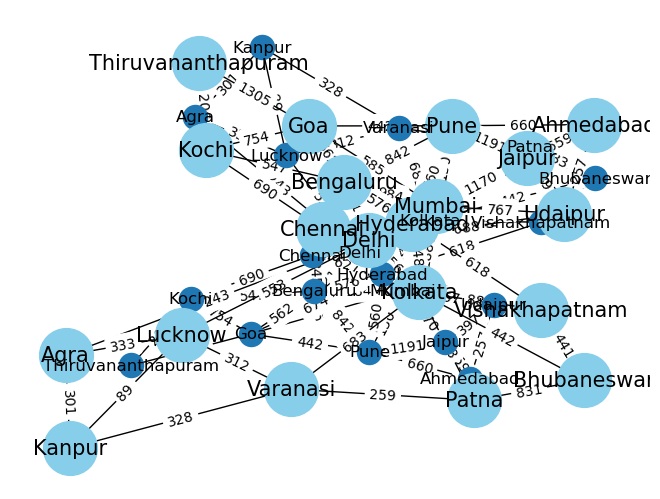

In [2]:
import networkx as nx
import math
import queue
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("indian-cities-dataset.csv")
G = nx.Graph()
G.add_weighted_edges_from(df.values)
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def astar(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((0 + heuristic[start], [start]))  # Initial state: f = g + h = 0 + heuristic

    while not pri_queue.empty():
        f, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                g = graph[current_node][neighbor]['weight']  # Cost from start to current node
                new_path = current_path + [neighbor]
                pri_queue.put((g + heuristic[neighbor], new_path))

    return []  # Goal not found


# Example graph
G = nx.Graph()
G.add_weighted_edges_from(df.values)

# start_node = 'Agra'
# goal_node = 'Lucknow'
start_node=input("Enter you starting city")
goal_node=input("ENter your destination ")

# Define positions for the nodes (for Euclidean distance calculation)
pos = nx.spring_layout(G)




# Heuristic function using Euclidean distance
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}

path = astar(G, start_node, goal_node, heuristic)
if path:
    print("Path from {} to {} found: {}".format(start_node, goal_node, ' -> '.join(path)))
    distance = 0
    for i in range(len(path)-1):
         distance += G[path[i]][path[i+1]]['weight']
    print("Distance is {} km".format(distance))
else:
     print("No path found from {} to {}".format(start_node, goal_node))



nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show